**Import Packages**

In [1]:
!pip install uv
!uv pip install nixtla --system
!uv pip install datasetsforecast --system

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 24.8 MB/s eta 0:00:00
Using Python 3.10.12 environment at /usr
Resolved 21 packages in 795ms
⠙ Preparing packages... (0/2)
⠙ Preparing packages... (0/2)
⠙ Preparing packages... (0/2)
⠙ Preparing packages... (0/2)
⠙ Preparing packages... (0/2)
⠙ Preparing packages... (0/2)
⠙ Preparing packages... (0/2)
Prepared 2 packages in 34ms
Installed 2 packages in 1ms
 + nixtla==0.6.2
 + utilsforecast==0.2.7
Using Python 3.10.12 environment at /usr
Resolved 34 packages in 1.73s
⠙ Preparing packages... (0/6)
⠙ Preparing packages... (0/6)
appdirs    ------------------------------     0 B/9.34 KiB
⠙ Preparing packages... (0/6)
appdirs    ------------------------------     0 B/9.34 KiB
⠙ Preparing packages... (0/6)
appdirs    ------------------------------     0 B/9.34 KiB
adagio     ------------------------------ 14.89 KiB/18.63 KiB
⠙ Preparing packages... (0/6)
appdirs    ------------------------------     0 B/9.34 KiB
adagio     -------------

In [2]:
from google.colab import userdata
from nixtla import NixtlaClient
nixtla_client = NixtlaClient(api_key=userdata.get('NIXTLA_API_KEY'))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


**Load Data**

In [3]:
from datasetsforecast.long_horizon import LongHorizon
Y_df, *_ = LongHorizon.load(directory='./', group='ETTh1')

Y_df.head()

100%|██████████| 314M/314M [00:22<00:00, 14.1MiB/s]


,unique_id,ds,y
0,OT,2016-07-01 00:00:00,1.460552
1,OT,2016-07-01 01:00:00,1.161527
2,OT,2016-07-01 02:00:00,1.161527
3,OT,2016-07-01 03:00:00,0.862611
4,OT,2016-07-01 04:00:00,0.525227


In [4]:
test = Y_df[-96:]
input_seq = Y_df[-1104:-96]

**Long Horizon Forecast**

In [5]:
fcst_df = nixtla_client.forecast(
    df=input_seq,
    h=96,
    level=[90],
    finetune_steps=10,
    finetune_loss='mae',
    model='timegpt-1-long-horizon',
    time_col='ds',
    target_col='y'
)

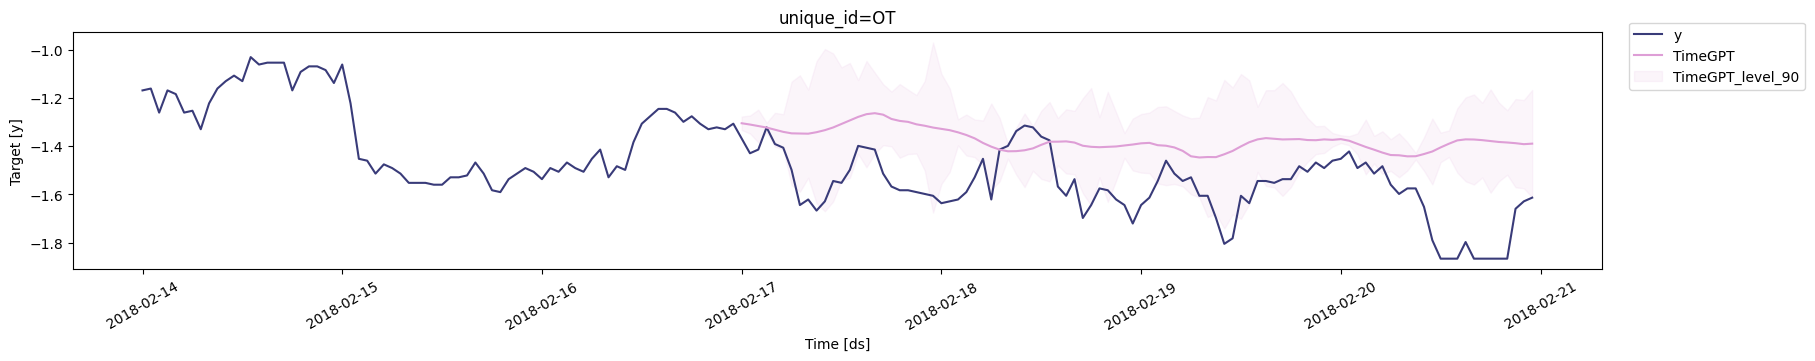

In [6]:
nixtla_client.plot(Y_df[-168:], fcst_df, models=['TimeGPT'], level=[90], time_col='ds', target_col='y')

**Evaluation**

In [7]:
test = test.copy()

test.loc[:, 'TimeGPT'] = fcst_df['TimeGPT'].values

In [8]:
from utilsforecast.losses import mae

evaluation = mae(test, models=['TimeGPT'], id_col='unique_id', target_col='y')

print(evaluation)

  unique_id   TimeGPT
0        OT  0.205319
